In [3]:
import sqlite3
import numpy as np

conn = sqlite3.connect("medical.db")
cur = conn.cursor()

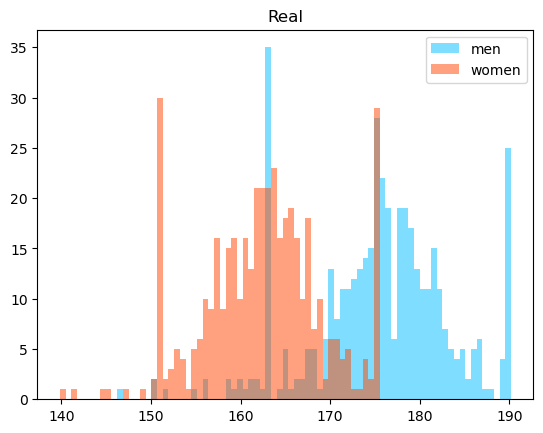

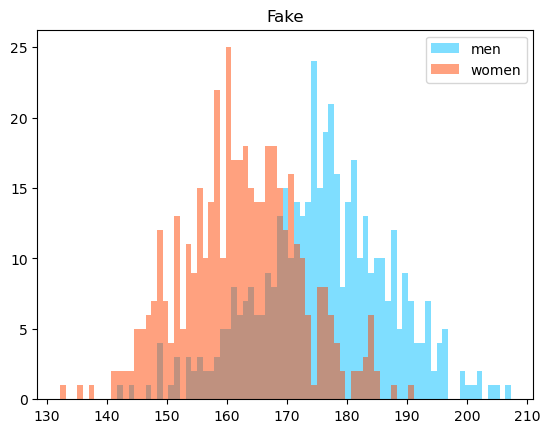

In [22]:
womenQuery = """
    SELECT AVG(CAST(o.value AS DECIMAL))
    FROM observations o
    JOIN patients p ON p.patient = o.patient
    WHERE o.description = 'Body Height' AND p.gender = 'F' AND p.birthdate < '2000'
    GROUP BY o.patient
"""

menQuery = """
    SELECT AVG(CAST(o.value AS DECIMAL))
    FROM observations o
    JOIN patients p ON p.patient = o.patient
    WHERE o.description = 'Body Height' AND p.gender = 'M' AND p.birthdate < '2000'
    GROUP BY o.patient
"""

cur.execute(womenQuery)
women = cur.fetchall()
cur.execute(menQuery)
men = cur.fetchall()
men2 = []
women2 = []
for m in men:
    men2.append(m[0])
for w in women:
    women2.append(w[0])

menDeviation = np.std(men2)
womenDeviation = np.std(women2)
men3 = []
women3 = []

for m in men:
    men3.append(np.random.normal(m[0], menDeviation))
for w in women:
    women3.append(np.random.normal(w[0], womenDeviation))

import matplotlib.pyplot as plt
import numpy

bins = numpy.linspace(
    min(min(women2), min(men2)),
    max(max(women2), max(men2)),
    80)
plt.hist(men2, bins, label='men', alpha=0.5, color='deepskyblue')

plt.hist(women2, bins, label='women', alpha=0.5, color='orangered')

plt.legend()
plt.title('Real')
plt.show()

bins = numpy.linspace(
    min(min(women3), min(men3)),
    max(max(women3), max(men3)),
    80)
plt.hist(men3, bins, label='men', alpha=0.5, color='deepskyblue')

plt.hist(women3, bins, label='women', alpha=0.5, color='orangered')

plt.legend()
plt.title('Fake')
plt.show()

In [73]:
for a in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    print(np.random.laplace(180.0, 5.0))

182.16632174881263
180.81186165237094
184.79278673205974
184.80635442576738
179.59380143579526
164.07361171778393
151.6036017731014
176.2674174912227
180.43329286771112
181.71164192064023


In [10]:
np.std([1, 2, 3])

0.816496580927726